In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.0 MB/s eta 0:00:00:00:0100:01


In [3]:
import rasterio
import glob
import skimage.io

In [4]:
def load_image(image_id, path):
    image_path = os.path.join(path, f'{image_id}.npy')
    img = np.load(image_path)

    return img

def convert_image_rgb(image):
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]

    rgb = np.dstack((red, green, blue))
    return rgb, rgb.shape

def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

In [29]:
import skimage

def increase_brightness(image, target_freq):
    new_image = np.zeros(image.shape)
    for c in range(3):
        channel = image[:,:,c]
        image_intensity = skimage.util.img_as_ubyte(channel)
        target_bins = np.arange(255)
        freq, bins = skimage.exposure.cumulative_distribution(image_intensity)
        new_vals = np.interp(freq, target_freq, target_bins)
        new_image[:,:,c] = skimage.util.img_as_ubyte(new_vals[image_intensity].astype(int))
        new_image = new_image.clip(0, 225).astype(int)

    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    img = ax[0].imshow(image)
    ax[1].imshow(new_image);
    
    return new_image

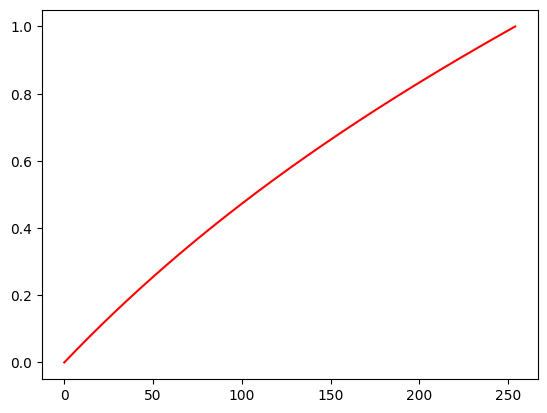

In [30]:
linear_cdf = np.linspace(0, 1, 255)
exp_cdf = 1 - np.exp(-1.5 * linear_cdf)
custom_cdf = (linear_cdf + exp_cdf) / max((linear_cdf + exp_cdf))

plt.plot(custom_cdf, c='r')

In [31]:
train_data = '/kaggle/input/slideandseekclasificationlandslidedetectiondataset/train_data/train_data'
train = '/kaggle/input/slideandseekclasificationlandslidedetectiondataset/Train.csv'

train_df = pd.read_csv(train)

In [37]:
def load_and_convert(image_id, path):
    raw = load_image(image_id, path)
    image, shape = convert_image_rgb(raw)
    normalized_image = normalize(image)
    # bright_image = increase_brightness(normalized_image, custom_cdf)
    return normalized_image

In [40]:
def visualize(image_id, path):
    print(image_id)
    rgb_image = load_and_convert(image_id, path)

    total_bands = rgb_image.shape[2]
    rows = (total_bands) // 2
    fig, axes = plt.subplots(figsize=(20, 5))
    axes.imshow(rgb_image)
    # axes[1].imshow(bright_image)
    plt.show()

no landslide
ID_JTADM7


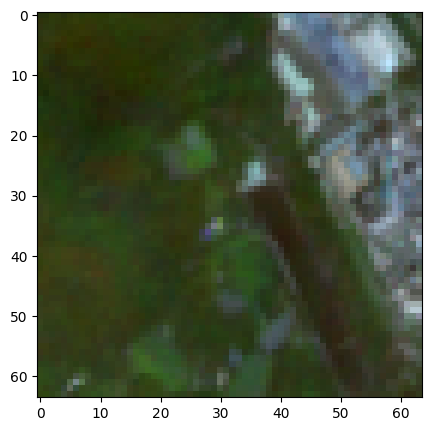

landslide
ID_2MXESO


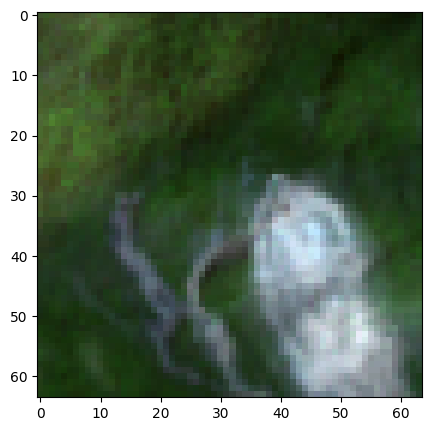

no landslide
ID_I698WJ


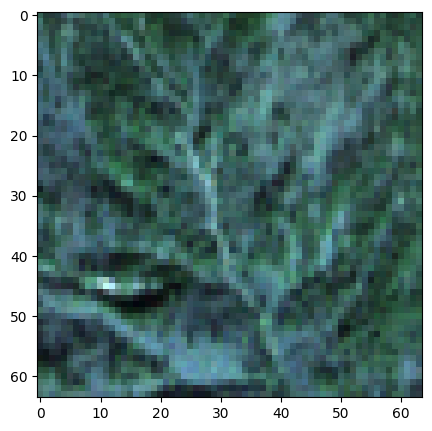

landslide
ID_CHIXM7


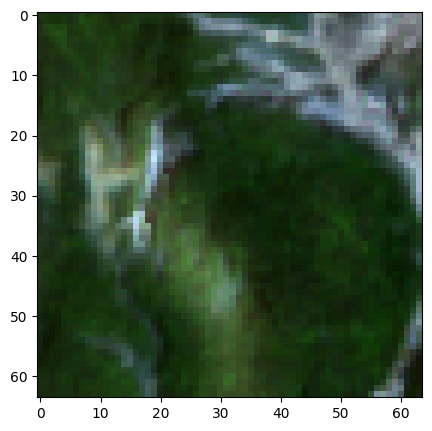

no landslide
ID_XWDWZW


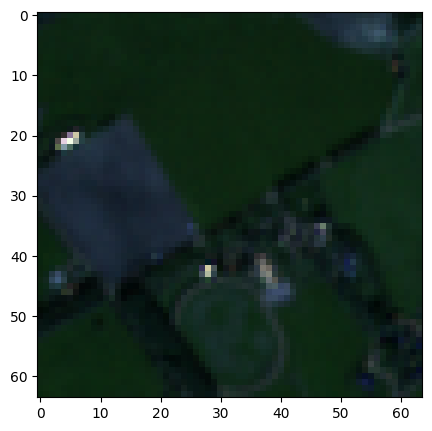

landslide
ID_MPH22Z


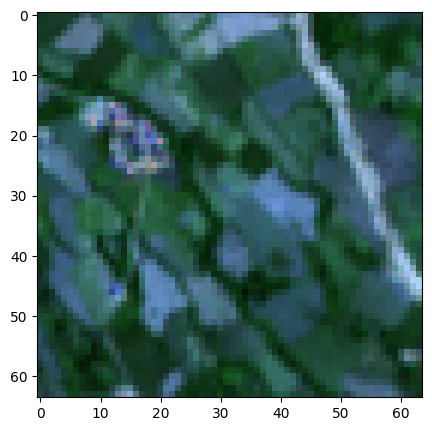

no landslide
ID_MH9SWL


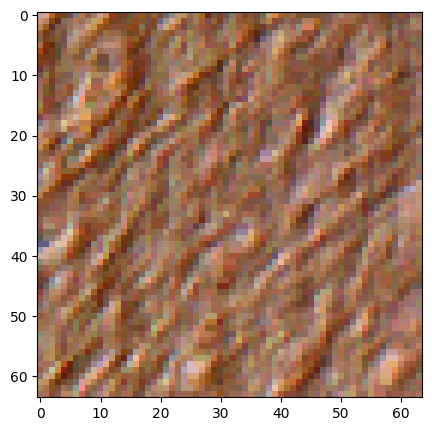

landslide
ID_RRJZ1I


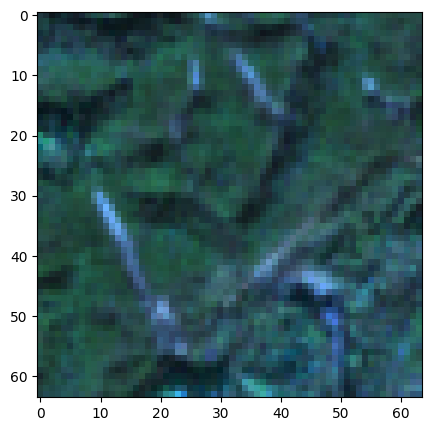

no landslide
ID_ZGVTSN


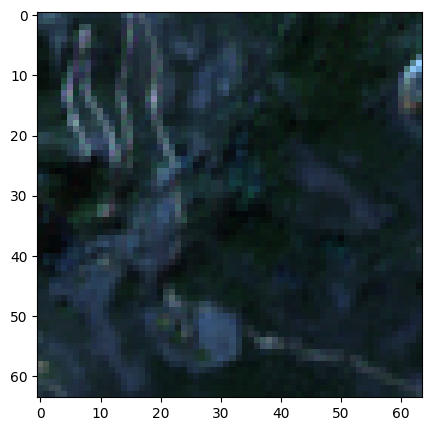

landslide
ID_MBWJQK


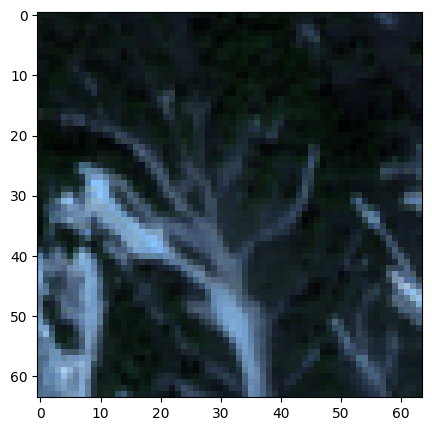

no landslide
ID_M03HES


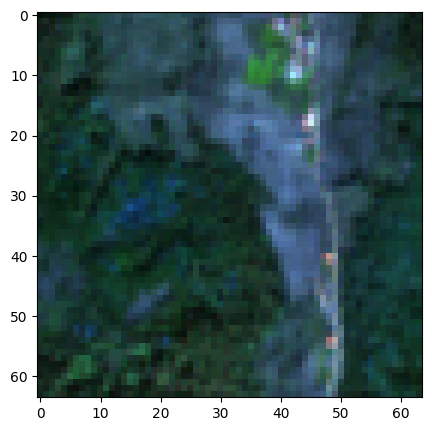

landslide
ID_4EPNQL


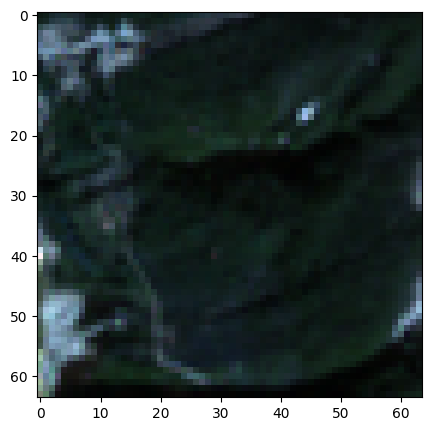

no landslide
ID_JU0LO4


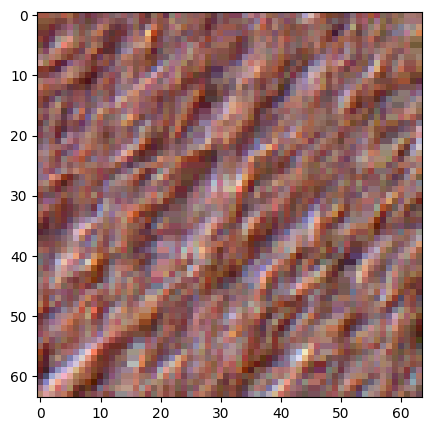

landslide
ID_NKGTSF


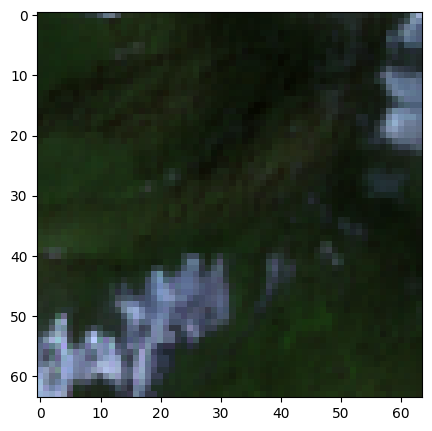

no landslide
ID_GNMTCL


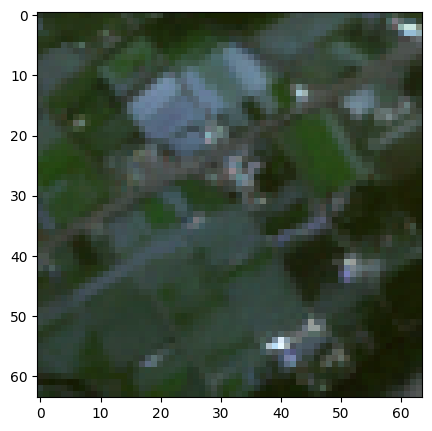

landslide
ID_ZJQL7U


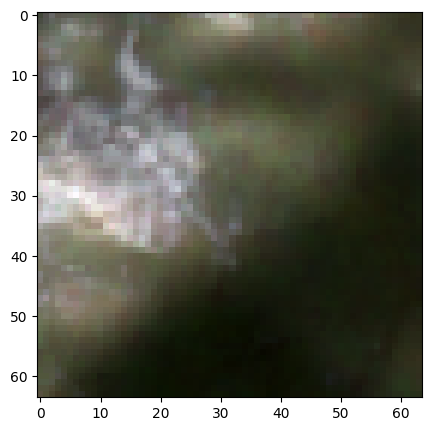

no landslide
ID_LL8I3N


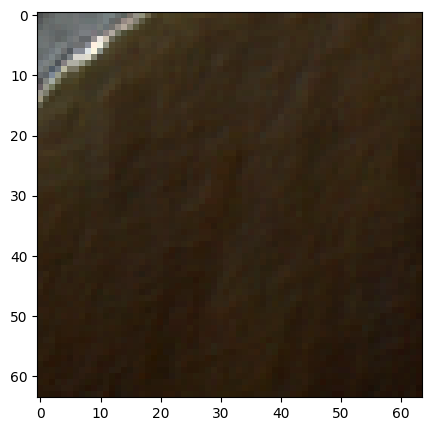

landslide
ID_WHZ7I0


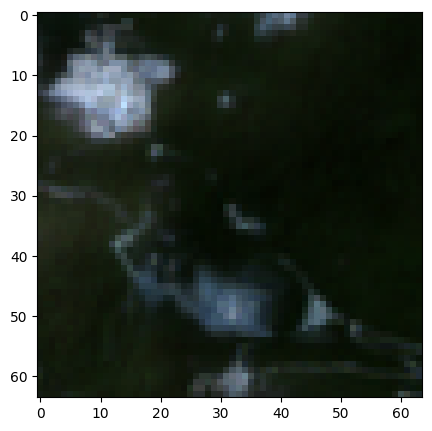

no landslide
ID_N597KG


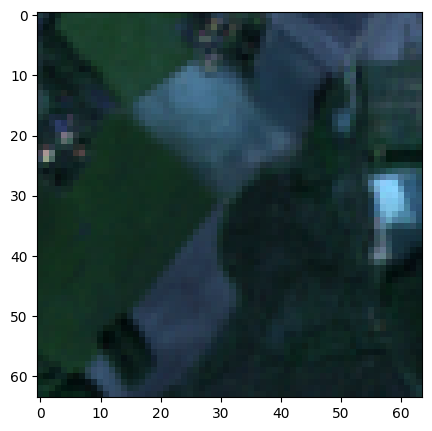

landslide
ID_6S788N


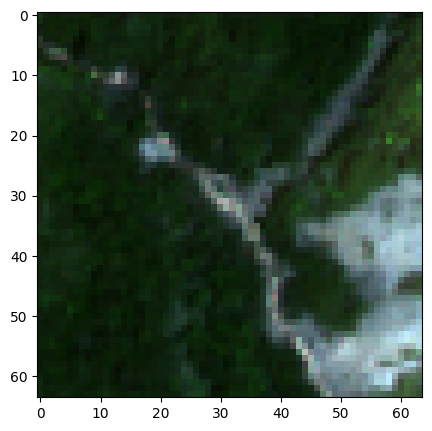

In [42]:
landslide = train_df.loc[train_df['label'] == 1]
no_landslide = train_df.loc[train_df['label'] != 1]

to_show = 10

example_ids_landslide = landslide['ID'].sample(to_show).values
example_ids_no_landslide = no_landslide['ID'].sample(to_show).values

for nids, lids in zip(example_ids_no_landslide, example_ids_landslide):
    print('no landslide')
    visualize(nids, train_data)
    print('landslide')
    visualize(lids, train_data)